# **Data Visualization Lab**


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-12-18 21:00:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  34.0MB/s    in 1.0s    

2024-12-18 21:00:34 (34.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

 How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


 How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


*Plot* a histogram of `ConvertedComp.`


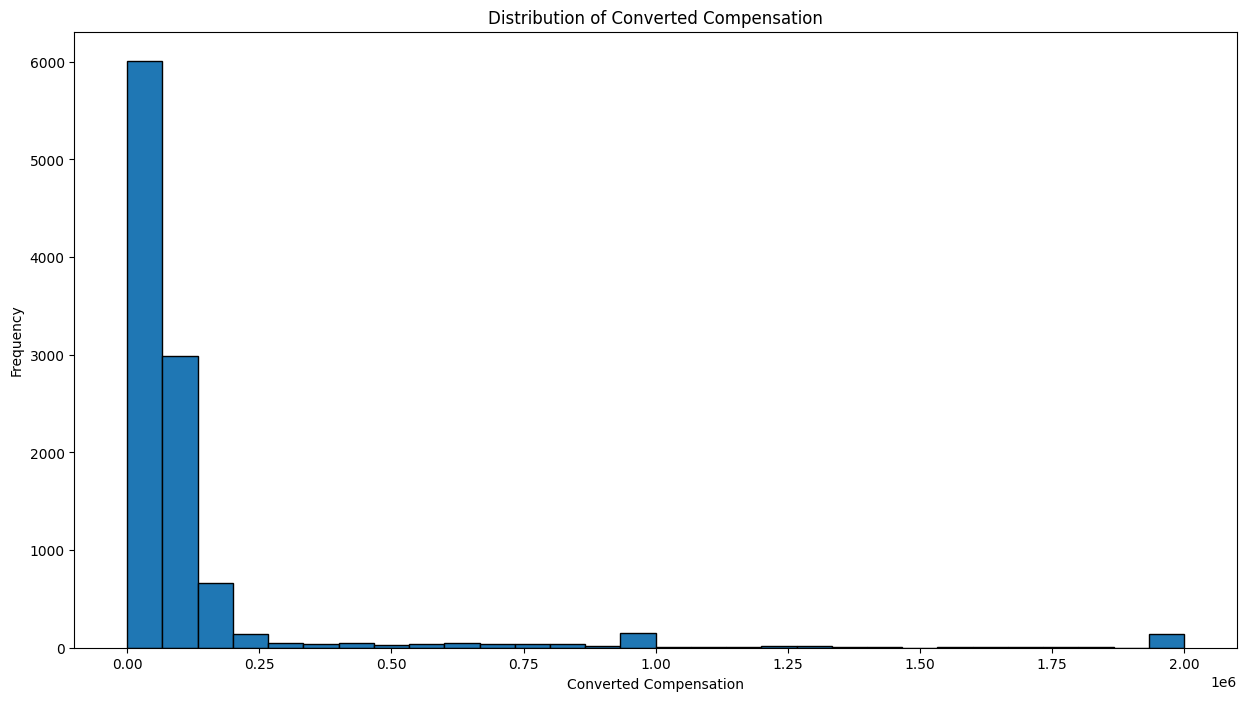

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

plt.hist(df['ConvertedComp'], bins=30, edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()


### Box Plots


Plot a box plot of `Age.`


        Age
0      22.0
1      23.0
2      28.0
3      26.0
4      29.0
...     ...
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

[11398 rows x 1 columns]


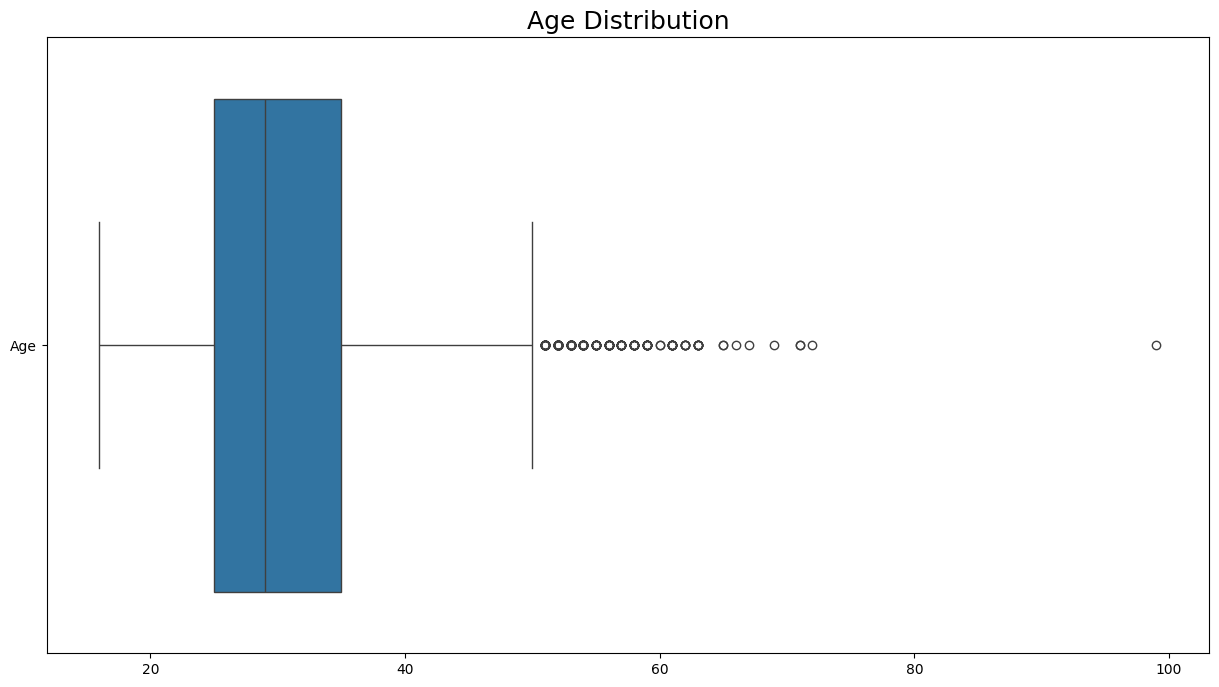

In [17]:
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.rcParams['figure.figsize'] = [15,8]

ax = sns.boxplot(data = df, orient = 'h') # Using seaborn for boxplot
ax.set_title('Age Distribution', size = 18)

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


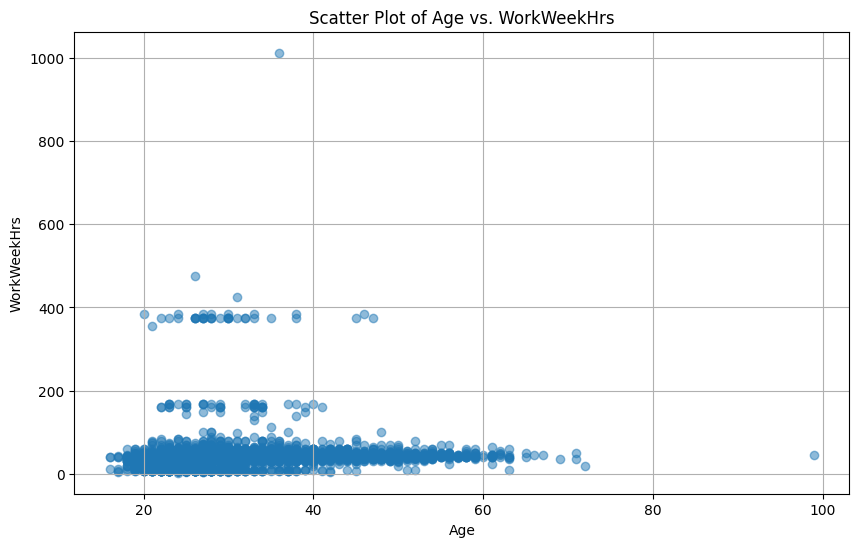

In [18]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)  # alpha for transparency
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs. WorkWeekHrs')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


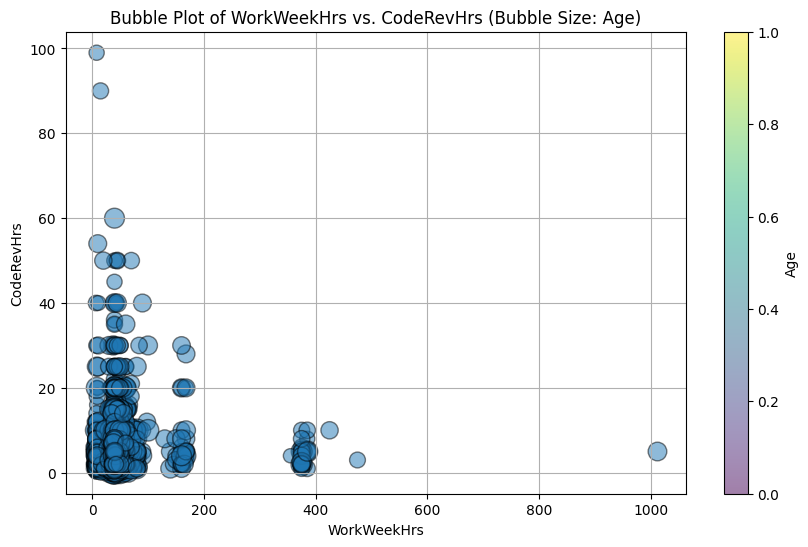

In [19]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'] * 5,
            alpha=0.5, edgecolors='black')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs (Bubble Size: Age)')
plt.grid(True)
plt.colorbar(label='Age')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


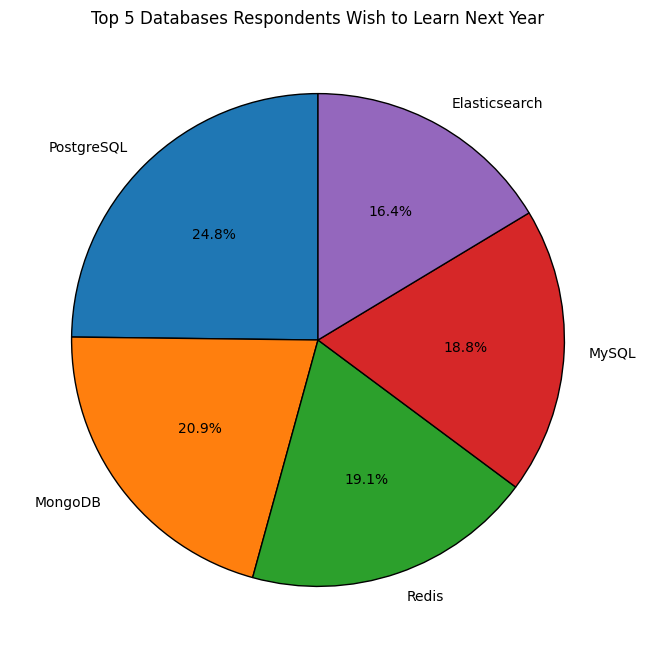

In [20]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


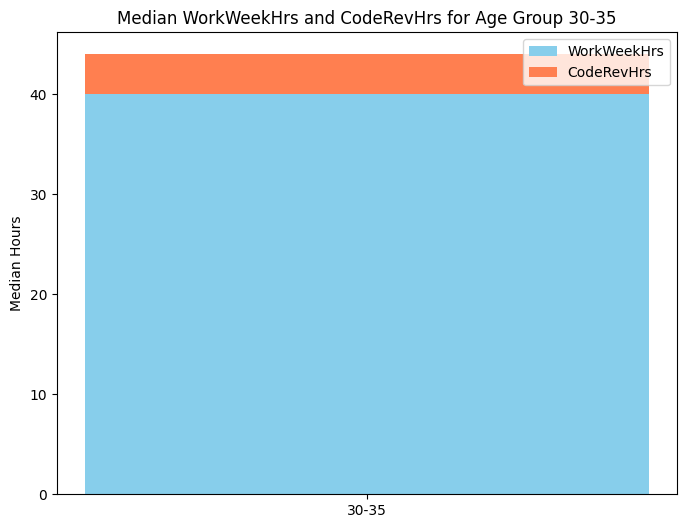

In [21]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df = pd.read_sql_query(QUERY, conn)

# Calculate median values
median_workweekhrs = df['WorkWeekHrs'].median()
median_coderevhrs = df['CodeRevHrs'].median()

plt.figure(figsize=(8, 6))
plt.bar('30-35', median_workweekhrs, label='WorkWeekHrs', color='skyblue')
plt.bar('30-35', median_coderevhrs, bottom=median_workweekhrs, label='CodeRevHrs', color='coral')

plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.legend()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


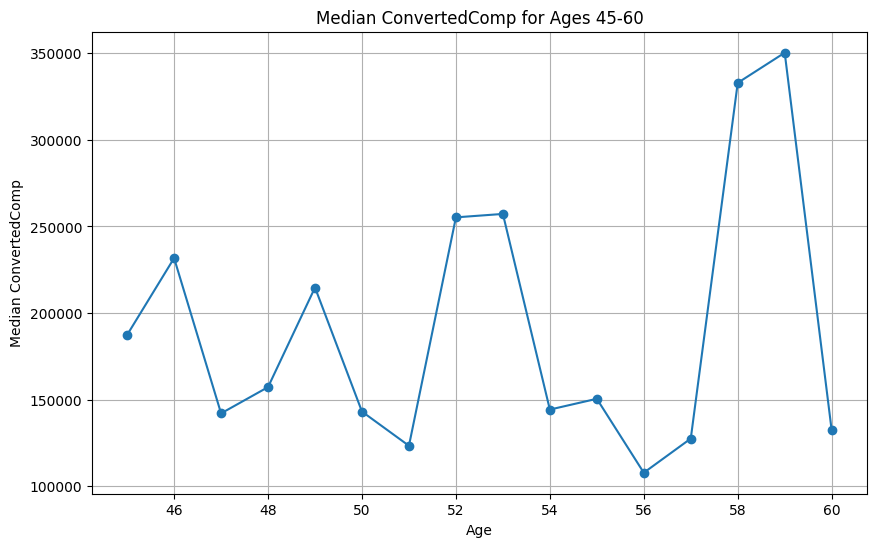

In [22]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT Age, AVG(ConvertedComp) AS MedianConvertedComp  -- Using AVG for median as there can be multiple entries per age
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
ORDER BY Age
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.plot(df['Age'], df['MedianConvertedComp'], marker='o', linestyle='-')  # Marker and linestyle for better visualization

plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp for Ages 45-60')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


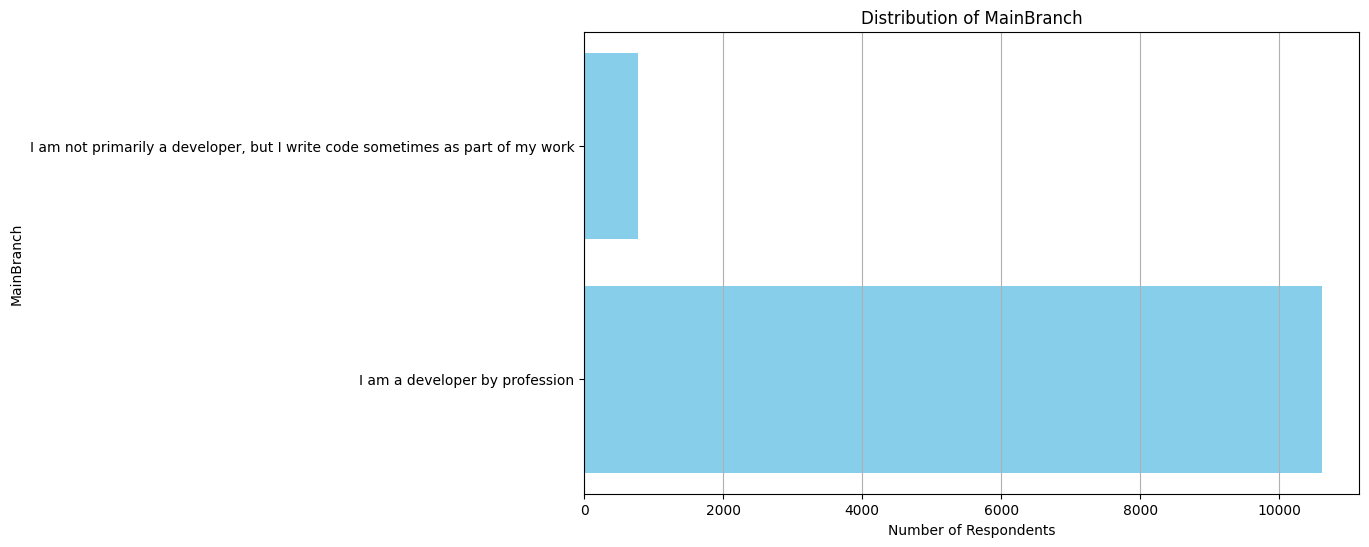

In [23]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue')

plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.title('Distribution of MainBranch')
plt.grid(axis='x')
plt.show()

Close the database connection.


In [24]:
conn.close()